In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('results_energy_estimation.csv')

agg_df = df[['energy_margin'] + [col for col in df.columns if 'AUROC' in col or col == 'ID_accuracy']].groupby(['energy_margin']).mean().round(4) * 100
agg_df

,ID_accuracy,l1_AUROC,l2_AUROC,l3_AUROC,all_AUROC,dogs_AUROC,places_AUROC,cars_AUROC,cfg_AUROC
energy_margin,,,,,,,,,
5,91.32,87.58,83.81,76.55,83.52,0.38,0.33,0.20,0.30
10,91.13,88.17,82.50,75.38,82.96,0.32,0.28,0.15,0.25
25,91.07,90.64,79.23,72.63,82.01,83.42,77.15,37.80,66.12
50,90.86,83.05,68.81,67.49,73.92,99.78,99.53,94.31,97.88
100,90.74,68.31,73.39,79.58,72.92,99.81,99.64,94.29,97.91
1000,90.67,68.53,73.60,75.20,72.05,99.79,99.67,93.28,97.58


In [25]:
agg_df.index.values

array([   5,   10,   25,   50,  100, 1000])

<AxesSubplot:xlabel='energy_margin'>

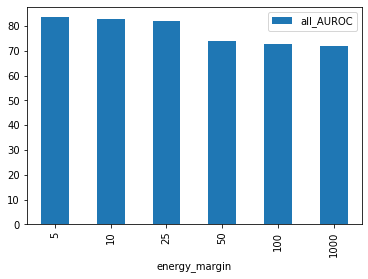

In [38]:
agg_df.plot(y="all_AUROC", kind='bar')

([<matplotlib.axis.XTick at 0x7f43bc1cb1c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

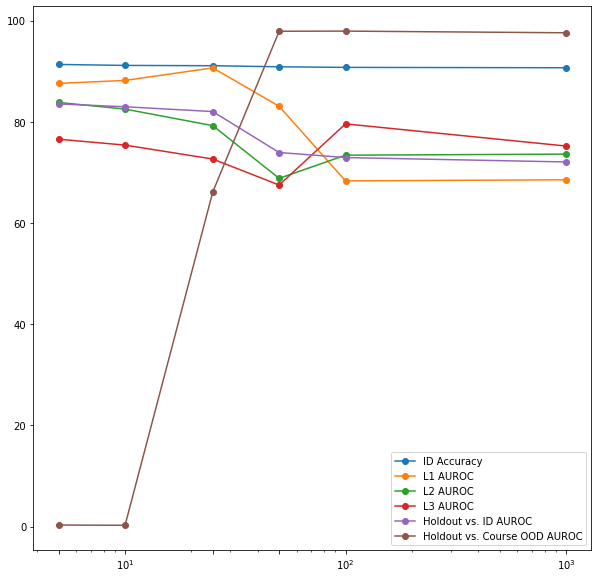

In [50]:
plot_cols = [col for col in agg_df.columns if col not in ['energy_margin', 'dogs_AUROC', 'places_AUROC','cars_AUROC']]


names_to_pretty = {
    'ID_accuracy': "ID Accuracy",
    "l1_AUROC": 'L1 AUROC',
    "l2_AUROC": 'L2 AUROC',
    "l3_AUROC": 'L3 AUROC',
    "all_AUROC": 'Holdout vs. ID AUROC',
    "cfg_AUROC": 'Holdout vs. Course OOD AUROC',

}

plt.figure(figsize=(10, 10))

for col in plot_cols:
    plt.plot(agg_df.index, agg_df[col], '-o', label=names_to_pretty[col])
    # plt.scatter(agg_df.index, agg_df[col])

plt.legend()

plt.xscale('log')
plt.xticks(agg_df.index)

In [4]:
df.columns

Index(['energy_margin', 'split', 'date', 'experiment', 'seed', 'loss',
       'n_epochs', 'batch_size', 'im_size', 'detector', 'ID_accuracy',
       'l1_AUROC', 'l2_AUROC', 'l3_AUROC', 'all_AUROC', 'l1_FPR95TPR',
       'l2_FPR95TPR', 'l3_FPR95TPR', 'all_FPR95TPR', 'dogs_AUROC',
       'places_AUROC', 'cars_AUROC', 'cfg_AUROC', 'dogs_FPR95TPR',
       'places_FPR95TPR', 'cars_FPR95TPR', 'cfg_FPR95TPR'],
      dtype='object')

## TSNE

In [3]:
import torch
import torchvision

import data
import lightning_models_dict as models
import pytorch_ood
import pytorch_lightning as pl



In [7]:
model_path = '/data/model_backups/models/planes/split1/2022-08-22-oe/1/epoch=99.ckpt'

config = {
    "dataset": 'planes',
    "split": 'split1',
    'batch_size': 20,
    "n_id_classes": 79,
    "objective": pytorch_ood.loss.OutlierExposureLoss(),
    "max_epochs": 100,
    "ood_ratio": 3,
}


model = models.OEModel(config)
model.load_state_dict(torch.load(model_path)['state_dict'])

model.model.fc = torch.nn.Identity()


In [8]:
loader = data.combined_test_loader('planes', 'split1', 20, 'big', level=-1)

# Bar plots

In [4]:
results = pd.read_csv('results.csv')
cols = [c for c in results.columns if 'AUROC' in c or 'FPR' in c]
results[cols] = results[cols] * 100
rgb = results.groupby(['split', 'loss', 'detector'])
rgb.mean()

experiment          seed  n_epochs  \
split  loss          detector                                             
split1 cross_entropy Softmax                3.0  2.223374e+18     100.0   
       energy        NegativeEnergy         3.0  8.142471e+18     100.0   
split2 oe            Softmax                3.0  6.244298e+18     100.0   
                     softmax_temp           3.0  1.542569e+18     100.0   

                                     batch_size  ID_accuracy   l1_AUROC  \
split  loss          detector                                             
split1 cross_entropy Softmax               64.0    89.301443  89.691161   
       energy        NegativeEnergy        64.0    87.509491  80.975015   
split2 oe            Softmax               64.0    81.267820  78.426440   
                     softmax_temp          64.0    81.267817  81.999446   

                                      l2_AUROC   l3_AUROC  all_AUROC  \
split  loss          detector                                          
split1 cross_entropy Softmax         85.746555  80.425258  85.982286   
       energy        NegativeEnergy  84.404451  71.070021  79.923134   
split2 oe            Softmax         80.603212  72.851667  78.073356   
                     softmax_temp    72.582917  58.638475  74.031465   

                                     l1_FPR95TPR  l2_FPR95TPR  l3_FPR95TPR  \
split  loss          detector                                                
split1 cross_entropy Softmax           34.472285    39.134396    49.840546   
       energy        NegativeEnergy    74.867122    53.272590    76.947609   
split2 oe            Softmax           55.303825    60.322580    60.082520   
                     softmax_temp      43.908477    68.627156    83.923481   

                                     all_FPR95TPR  
split  loss          detector                      
split1 cross_entropy Softmax            41.473045  
       energy        NegativeEnergy     71.169324  
split2 oe            Softmax            58.417104  
                     softmax_temp       71.087773

In [7]:
rgb.sem()

experiment  seed  n_epochs  batch_size  \
split  loss          detector                                               
split1 cross_entropy Softmax         0.707107   0.0       0.0         0.0   
split2 oe            Softmax         0.707107   0.0       0.0         0.0   
                     softmax_temp    0.707107   0.0       0.0         0.0   

                                   ID_accuracy  l1_AUROC  l2_AUROC  l3_AUROC  \
split  loss          detector                                                  
split1 cross_entropy Softmax          0.000835  0.003905  0.004692  0.007669   
split2 oe            Softmax          0.002649  0.008743  0.001686  0.006050   
                     softmax_temp     0.002649  0.009513  0.011781  0.029193   

                                   all_AUROC  l1_FPR95TPR  l2_FPR95TPR  \
split  loss          detector                                            
split1 cross_entropy Softmax        0.003046     0.015859     0.008506   
split2 oe            Softmax        0.003675     0.010933     0.012332   
                     softmax_temp   0.008329     0.019218     0.021974   

                                   l3_FPR95TPR  all_FPR95TPR  
split  loss          detector                                 
split1 cross_entropy Softmax          0.020181      0.011042  
split2 oe            Softmax          0.020695      0.005979  
                     softmax_temp     0.046756      0.030178

In [3]:
df = pd.read_csv('exp_results.csv')
df = df[df['n_epochs'] > 1]
df 

,split,date,experiment,seed,loss,n_epochs,batch_size,ood_ratio,imsize,detector,...,l2_AUROC,l2_AUPR-IN,l2_AUPR-OUT,l2_ACC95TPR,l2_FPR95TPR,l3_AUROC,l3_AUPR-IN,l3_AUPR-OUT,l3_ACC95TPR,l3_FPR95TPR
0,split1,2022_08_01,1,4729308572811942276,ring,100,64,0.2,big,ODIN,...,0.748389,0.367630,0.920540,0.568142,0.547836,0.737606,0.279694,0.941614,0.489151,0.598330
1,split1,2022_08_01,1,4729308572811942276,ring,100,64,0.2,big,Softmax,...,0.841756,0.512926,0.951341,0.658416,0.430144,0.797910,0.341380,0.957382,0.578175,0.492407
2,split1,2022_08_01,1,4729308572811942276,ring,100,64,0.2,big,NegativeEnergy,...,0.761721,0.422321,0.907925,0.433605,0.723235,0.659890,0.235333,0.909676,0.305999,0.816249
3,split1,2022_08_01,2,4729308572811942276,ring,100,64,0.2,big,ODIN,...,0.730061,0.357227,0.912345,0.548049,0.574032,0.758842,0.303636,0.949506,0.565731,0.507213
4,split1,2022_08_01,2,4729308572811942276,ring,100,64,0.2,big,Softmax,...,0.851772,0.533173,0.954837,0.692778,0.385345,0.783919,0.336405,0.952677,0.507339,0.576689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,split2,2022_08_08,4,6244298157479741865,oe,100,128,0.2,big,Softmax,...,0.800603,0.424219,0.940545,0.515449,0.598650,0.709391,0.208763,0.945930,0.399217,0.683421
59,split2,2022_08_08,4,6244298157479741865,oe,100,128,0.2,big,NegativeEnergy,...,0.596451,0.236946,0.862041,0.354724,0.801575,0.457182,0.116615,0.856345,0.156230,0.962866
60,split2,2022_08_08,5,6244298157479741865,oe,100,128,0.2,big,ODIN,...,0.735661,0.382101,0.918964,0.495841,0.623406,0.697824,0.209022,0.944119,0.430855,0.647037
61,split2,2022_08_08,5,6244298157479741865,oe,100,128,0.2,big,Softmax,...,0.808369,0.438370,0.943671,0.538919,0.569017,0.746521,0.235807,0.955746,0.487606,0.581770


In [6]:
gb = df[(df['date'] != '2022_08_04') | (df['loss'] == 'cutmix')].groupby(['split', 'loss', 'detector'])
gb_mean = gb.mean()
gb_error = gb.sem()

In [7]:
gb_mean

experiment          seed  n_epochs  \
split  loss          detector                                             
split1 cross_entropy NegativeEnergy    2.000000  3.660894e+18     100.0   
                     ODIN              2.000000  3.660894e+18     100.0   
                     Softmax           2.000000  3.660894e+18     100.0   
       cutmix        NegativeEnergy    1.333333  5.336226e+18     100.0   
                     ODIN              1.333333  5.336226e+18     100.0   
                     Softmax           1.333333  5.336226e+18     100.0   
       energy        NegativeEnergy    2.000000  2.975203e+18     100.0   
                     ODIN              2.000000  2.975203e+18     100.0   
                     Softmax           2.000000  2.975203e+18     100.0   
       oe            NegativeEnergy    2.000000  5.719864e+18     100.0   
                     ODIN              2.000000  5.719864e+18     100.0   
                     Softmax           2.000000  5.719864e+18     100.0   
       ring          NegativeEnergy    2.000000  4.729309e+18     100.0   
                     ODIN              2.000000  4.729309e+18     100.0   
                     Softmax           2.000000  4.729309e+18     100.0   
split2 oe            NegativeEnergy    3.000000  6.244298e+18     100.0   
                     ODIN              3.000000  6.244298e+18     100.0   
                     Softmax           3.000000  6.244298e+18     100.0   

                                     batch_size  ood_ratio  l1_AUROC  \
split  loss          detector                                          
split1 cross_entropy NegativeEnergy        64.0        0.2  0.910302   
                     ODIN                  64.0        0.2  0.631612   
                     Softmax               64.0        0.2  0.896397   
       cutmix        NegativeEnergy        64.0        0.2  0.856802   
                     ODIN                  64.0        0.2  0.649667   
                     Softmax               64.0        0.2  0.872789   
       energy        NegativeEnergy        64.0        0.2  0.719901   
                     ODIN                  64.0        0.2  0.561734   
                     Softmax               64.0        0.2  0.830150   
       oe            NegativeEnergy        64.0        0.2  0.923575   
                     ODIN                  64.0        0.2  0.644372   
                     Softmax               64.0        0.2  0.901558   
       ring          NegativeEnergy        64.0        0.2  0.923037   
                     ODIN                  64.0        0.2  0.654013   
                     Softmax               64.0        0.2  0.898872   
split2 oe            NegativeEnergy       128.0        0.2  0.808711   
                     ODIN                 128.0        0.2  0.533979   
                     Softmax              128.0        0.2  0.784264   

                                     l1_AUPR-IN  l1_AUPR-OUT  l1_ACC95TPR  \
split  loss          detector                                               
split1 cross_entropy NegativeEnergy    0.661027     0.970693     0.780237   
                     ODIN              0.298346     0.855857     0.372452   
                     Softmax           0.645014     0.967563     0.741604   
       cutmix        NegativeEnergy    0.538906     0.955347     0.676276   
                     ODIN              0.331949     0.870706     0.428558   
                     Softmax           0.561319     0.961959     0.721219   
       energy        NegativeEnergy    0.437490     0.869741     0.316735   
                     ODIN              0.267185     0.819128     0.333333   
                     Softmax           0.530101     0.942630     0.584644   
       oe            NegativeEnergy    0.669315     0.977693     0.829742   
                     ODIN              0.304344     0.865807     0.396525   
                     Softmax           0.646580     0.969482     0.737624   
       ring      

(0.0, 1.0)

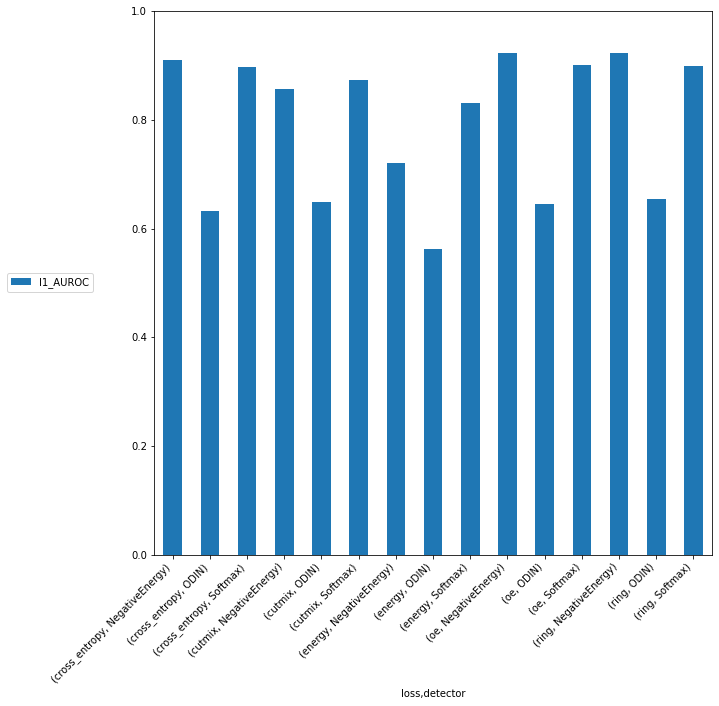

In [52]:

gb_mean.plot.bar(y='l1_AUROC', rot=45, figsize=(10,10))
plt.xticks(ha='right')
plt.legend(loc='center right', bbox_to_anchor=(-0.1, 0.5))
plt.ylim([0, 1])

In [54]:
tmp = [idx[0] for idx in gb_mean.index]
losses = [tmp[i] for i in range(len(tmp)) if tmp[i] not in tmp[:i]]
losses

['cross_entropy', 'cutmix', 'energy', 'oe', 'ring']

In [79]:
def model_comparison(metric):
    data = gb_mean.join(gb_error, lsuffix='_mean', rsuffix='_err')
    needed = [col for col in data.columns if metric in col]
    data = data[needed]

    bar_width = 0.25

    fig, axes = plt.subplots(3, len(losses) // 2, figsize=(20, 20))

    for i, loss in enumerate(losses):
        row, col = i // 2, i % 2
        ax = axes[row, col]

        loss_data = data.loc[loss]

        for level in range(1, 4):
            mean, err = loss_data[f'l{level}_{metric}_mean'], loss_data[f'l{level}_{metric}_err']
            x_values = np.arange(len(mean))
            ax.bar(x_values + (level - 1) * bar_width, mean, yerr=err, width=bar_width)

            ax.set_xticklabels(loss_data.index)
            ax.set_xticks(x_values + bar_width)
            ax.set_title(loss)
            ax.set_ylim([0, 1] if metric != 'AUROC' else [0.5, 1])
            ax.set_yticks(np.arange(0, 1.1, 0.1))
            ax.grid(True, axis='y')

    axes[-1, -1].axis('off')

    plt.suptitle(f"Model Comparison by {metric}")

    plt.savefig('./figures/model_comparison/{metric}.jpg')    
        

/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(loss_data.index)
/tmp/ipykernel_3250882/353998001.py:21: UserWarning: FixedFormatter should only be

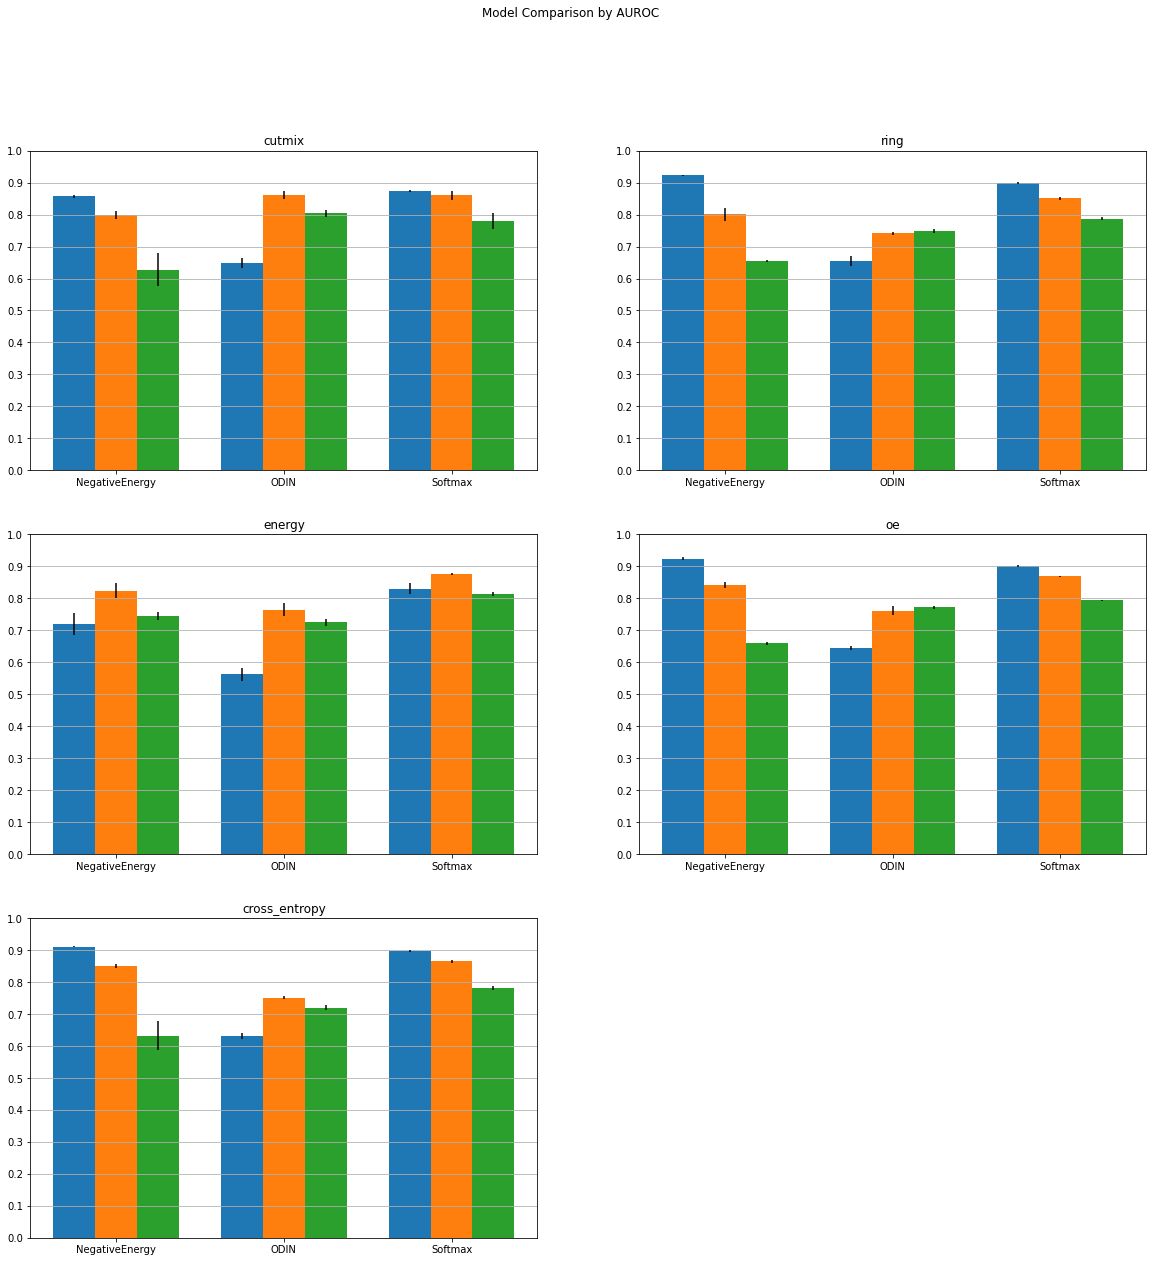

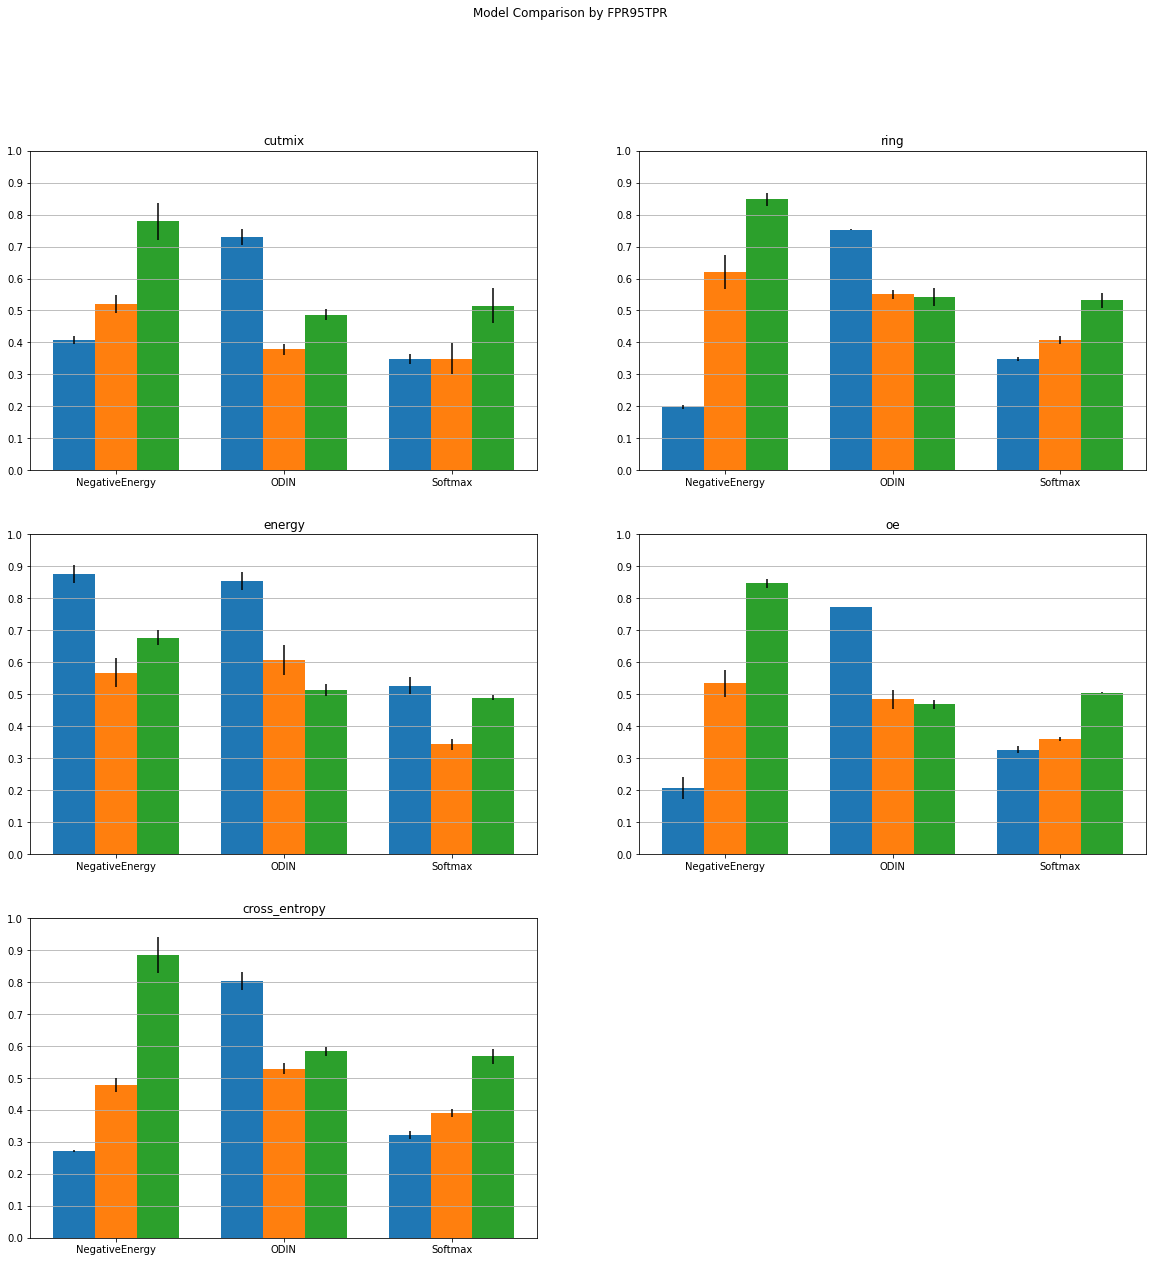

In [80]:
for metric in ['AUROC', 'FPR95TPR']:
    model_comparison(metric)

# Hist Plots

In [1]:
from sklearn.neighbors import KernelDensity
import torch
import torch.nn as nn 
import torch.utils.data as utilsdata

from torchvision import transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder

from fgcv_aircraft_code import Dataset_fromTxtFile as txtfiledataset
from data import get_transforms, dataset_root

import pytorch_ood


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 8


/home/noah2/anaconda3/envs/torch/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_model(loss, path=None):
    date = 2
    if loss in ['mixup', 'ring'] : date = 1

    if loss == 'cutmix': path = './models/split1-2022_08_4-cutmix/1/epoch_100.pt'

    model = resnet50()
    model.fc = nn.Linear(2048, 80)
    model = nn.DataParallel(model)

    if path is None: path = f'./models/split1-2022_08_0{date}-{loss}/1/epoch_100.pt'
    model.load_state_dict(
        torch.load(path)()
    )
    

    model.to(DEVICE)
    model.eval()

    return model



In [3]:
transform_test = get_transforms('big', False)
DATASET_ROOT = dataset_root('split2')

ID_test_dataset = txtfiledataset.Dataset_fromTxtFile(
    DATASET_ROOT + "/ID_testset.txt", transform_test, is_fgcvaircraft=True
)

ID_testloader = utilsdata.DataLoader(ID_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

OOD_test_dataset = txtfiledataset.Dataset_fromTxtFile(
    DATASET_ROOT + "/OOD_testset.txt",
    transform_test,
    is_fgcvaircraft=True,
    target_transform = lambda x: 1
)

OOD_planes_testloader = utilsdata.DataLoader(OOD_test_dataset, batch_size=BATCH_SIZE, shuffle=True,)


cars_ood_dataset = ImageFolder('/data/cars/cars_test_parent', 
    transform=transform_test,
    target_transform=lambda x: 0
)
OOD_cars_testloader = utilsdata.DataLoader(cars_ood_dataset, batch_size=BATCH_SIZE, shuffle=True)

combined_loader = utilsdata.DataLoader(
    utilsdata.ConcatDataset([ID_test_dataset + OOD_test_dataset]),
    batch_size=BATCH_SIZE,
    shuffle=True
)

combined_ood_loader = utilsdata.DataLoader(
    utilsdata.ConcatDataset([cars_ood_dataset + OOD_test_dataset]),
    batch_size=BATCH_SIZE,
    shuffle=True
)


In [12]:
from pytorch_ood.utils import is_known

X, y = next(iter(combined_loader))

is_known(y)

tensor([True, True, True, True, True, True, True, True])

In [4]:
# model = resnet50()
# model = nn.DataParallel(model)

# model.load_state_dict(
#     torch.load(f'./models/1000classes/1/epoch_100.pt')()
# )

# model.to(DEVICE)

# model = load_model('cutmix',  path='./models/split1-2022_08_4-cutmix/1/epoch_100.pt')


def create_kde_figure(model, save_name=None):
    plt.figure(figsize=(10, 10))

    max = -1

    with torch.no_grad():
        # model = load_model('ring')

        test_loaders = [ID_testloader, OOD_planes_testloader, OOD_cars_testloader]

        for loader in test_loaders:

            score_holder = -1

            for i, (X, _) in enumerate(loader):
                if i>= 25: break

                scores = model.forward(X).softmax(dim=1).max(dim=1).values
                scores = scores.cpu().numpy()

                max = np.max([max, scores.max()])

                if isinstance(score_holder, int): 
                    score_holder = scores.copy()
                else:
                    score_holder = np.concatenate([score_holder, scores], axis=None)

            kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(score_holder.reshape(-1, 1))
            x_range = np.arange(0, 1, 0.005).reshape(-1, 1)
            plt.plot(x_range, np.exp(kde.score_samples(x_range)))
            # plt.hist(score_holder, bins=20)

    if save_name is not None:
        plt.title(save_name)
        plt.savefig(f'./figures/kde/{save_name}.jpg')



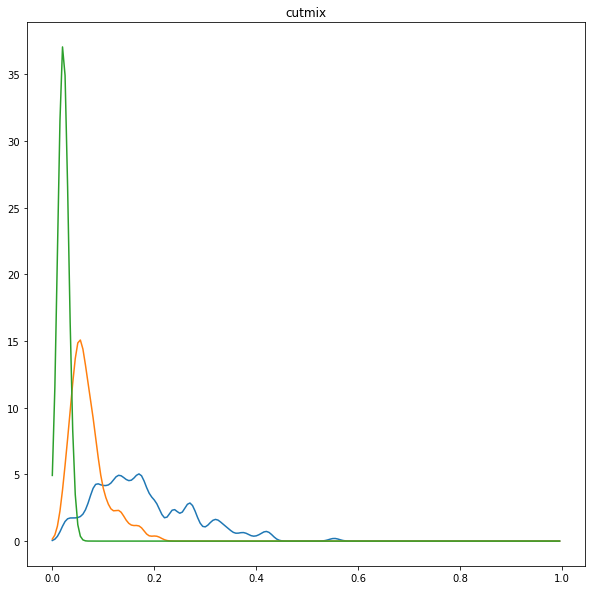

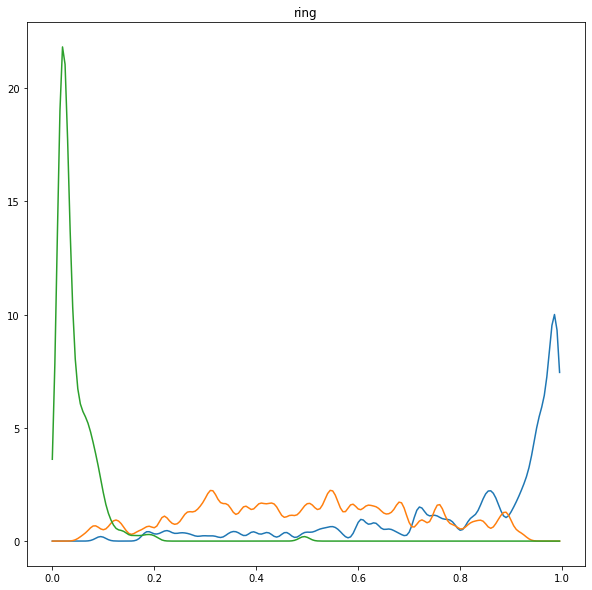

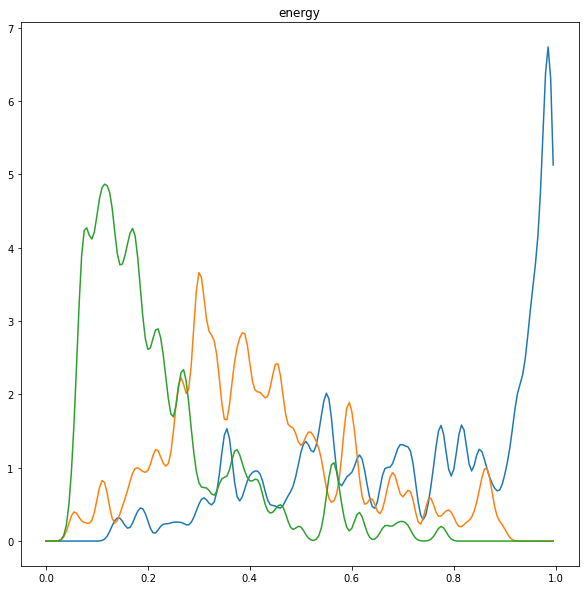

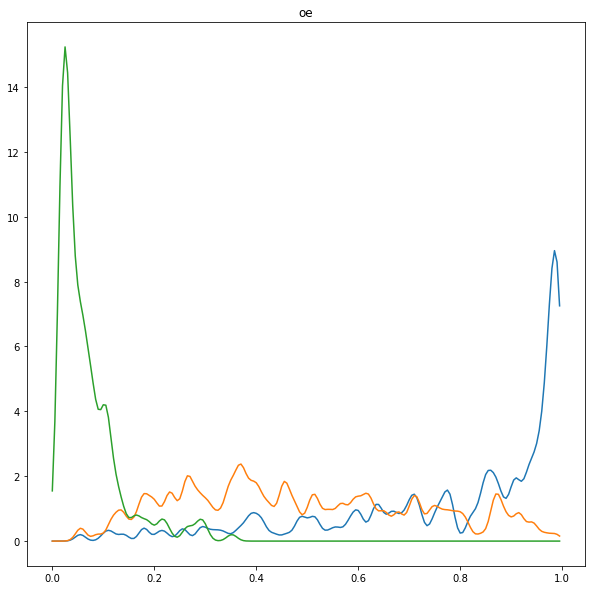

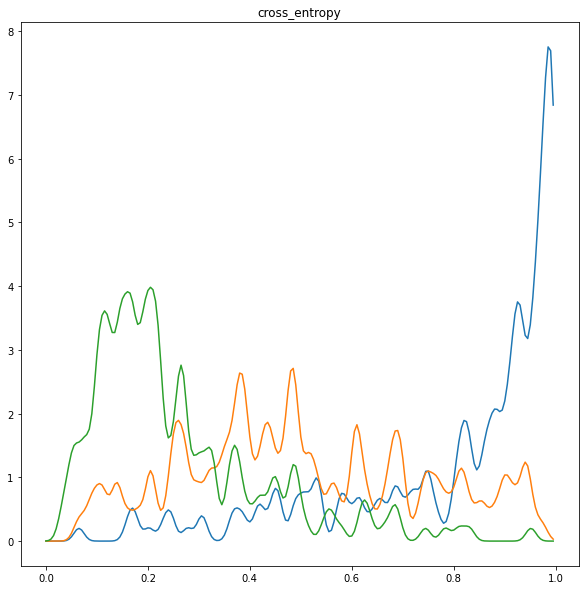

In [21]:
with torch.no_grad():

    model = load_model('cutmix',  path='./models/split1-2022_08_4-cutmix/1/epoch_100.pt')
    create_kde_figure(model, 'cutmix')

    losses = ['ring', 'energy', 'oe', 'cross_entropy']

    for loss in losses:

        model = load_model(loss)
        create_kde_figure(model, loss)

In [18]:
def accuracy(model):

    n_correct = 0
    n_total = 0

    for i, (X, y) in enumerate(ID_testloader):
        if i>= 100: break
        X, y = X.to(DEVICE), y.to(DEVICE)
        _, preds = model(X).softmax(dim=1).max(dim=1)

        n_correct += preds.eq(y).sum().item()
        n_total += preds.shape[0]

    return n_correct / n_total * 100


In [19]:
accs = []

for n in range(1, 6):
    model = load_model('oe', path=f'./models/split2-2022_08_08-oe/{n}/epoch_100.pt')
    accs.append(accuracy(model))
    print(accs[-1])

82.75
80.0
81.375
80.75
82.0


In [20]:
x = 0
for a in accs:
    x += a

x / len(accs)

82.95

In [76]:
from torchmetrics import AUROC

def OOD_AUROC(model, loader):
    with torch.no_grad():
        metric = AUROC()

        for i, (X, y) in enumerate(loader):
            if i >= 50: break
            X, y = X.to(DEVICE), y.to(DEVICE)

            metric.update(model(X).softmax(dim=1).max(dim=1).values, y)

        result = metric.compute().item()

        del metric
        return result


In [77]:
print('cutmix', accuracy(load_model('cutmix',  path='./models/split1-2022_08_4-cutmix/1/epoch_100.pt')))


KeyboardInterrupt: 

In [78]:
with torch.no_grad():

    # print('cutmix', accuracy(load_model('cutmix',  path='./models/split1-2022_08_4-cutmix/1/epoch_100.pt')))

    losses = ['cutmix', 'ring', 'energy', 'oe', 'cross_entropy']

    for loss in losses:

        model = load_model(loss)
        print(f"Loss: {loss} ID Accuracy: {accuracy(model)} Cars/OOD Planes AUROC: {OOD_AUROC(model, combined_ood_loader)}")
        # print(loss, accuracy(model), OOD_AUROC(model, combined_ood_loader))

/home/noah2/anaconda3/envs/torch/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Loss: cutmix ID Accuracy: 78.0 Cars/OOD Planes AUROC: 0.9827451705932617
Loss: ring ID Accuracy: 92.0 Cars/OOD Planes AUROC: 0.9989346265792847
Loss: energy ID Accuracy: 88.25 Cars/OOD Planes AUROC: 0.7738732099533081
Loss: oe ID Accuracy: 87.75 Cars/OOD Planes AUROC: 0.9826996326446533
Loss: cross_entropy ID Accuracy: 89.0 Cars/OOD Planes AUROC: 0.8377549052238464


In [8]:
def eval(model, test_loader, detector, limit=20):
    """Evaluate the model using the given dataloader

    Args:
        model (nn.Module): Model to Evaluate
        test_loader (Dataloader): _description_
        detector (pytorch_ood.Detector, optional): pytorch OOD detector. Defaults to DETECTOR.
        limit (int, optional): Number of batches to evaluate on. Defaults to 20.
        trainloader (_type_, optional): loader of training data, if needed for detector's `fit` method. Defaults to None.

    Returns:
        Dict: dictionary of metrics
    """
    model.eval()
    model_detector = detector(model)

    metrics = pytorch_ood.utils.OODMetrics()

    with torch.no_grad():
        for i, (pkg) in enumerate(test_loader):
            if limit != -1 and i >= limit:
                break
            X, y = pkg[0].to(DEVICE), pkg[1].to(DEVICE)

            metrics.update(model_detector(X), y)

        return metrics.compute()

In [48]:
eval(model, combined_loader, pytorch_ood.detector.Softmax, limit=80)

{'AUROC': 0.7142070531845093,
 'AUPR-IN': 0.6281471848487854,
 'AUPR-OUT': 0.7567549347877502,
 'ACC95TPR': 0.614062488079071,
 'FPR95TPR': 0.6734104156494141}

In [19]:
model = load_model('ring')

In [37]:
model = resnet50(pretrained=True)

/home/noah2/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/noah2/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [38]:
for module in model.modules():
    if isinstance(module, nn.Linear): print(module)

Linear(in_features=2048, out_features=1000, bias=True)


DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [9]:
from data import training_data
import torch

In [6]:
I, O = training_data('split1', 20, 'big', 5)

In [7]:
X, y = next(iter(I))
oex, oey, = next(O)

In [11]:
torch.cat((X, oex)).shape

torch.Size([120, 3, 448, 448])

In [12]:
torch.cat((y, oey)).shape

torch.Size([120])